Explanatory Modeling for German Credit Data

Data pulled from UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

Credits:
Hofmann,Hans. (1994). Statlog (German Credit Data). UCI Machine Learning Repository. https://doi.org/10.24432/C5NC77.

# Setup

## Load Libraries

In [31]:
from ucimlrepo import fetch_ucirepo

# General
import pandas as pd
import numpy as np
import pylab as py

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns
import sweetviz as sv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Statistical Tests
from scipy.stats import chi2_contingency
import statsmodels.api as sma
import statsmodels as sm
import scipy.stats as stats
import scipy as sp

# Statsmodels
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.generalized_linear_model import GLM

## Load Dataset

In [2]:
# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id = 144)

# Create two seperate pandas dataframe for feature and target variables
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Combine the features and target together
df = pd.concat([X, y], axis = 1)
df.head(10)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


## Data Dictionary

In [3]:
data_dic = pd.DataFrame(statlog_german_credit_data.variables)

cat_vars = data_dic[data_dic["type"] == "Categorical"]["name"].values

bin_vars = data_dic[(data_dic["type"] == "Binary") & (data_dic["role"] == "Feature")]["name"].values

cont_vars = data_dic[data_dic["type"] == "Integer"]["name"].values

data_dic

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [ ]:
cat_vars

In [ ]:
bin_vars

In [ ]:
not_cont

In [ ]:
np.asarray(not_cont, dtype = "object")

In [4]:
### Check Continuous Variables to see if they have at least 10 distinct values
not_cont = []
is_cont = []
for i in cont_vars:
    var_unique = len(np.unique(df[i]))
    print(i, var_unique)
    if var_unique < 10:
        not_cont.append(i)
    else:
        is_cont.append(i)

Attribute2 33
Attribute5 921
Attribute8 4
Attribute11 4
Attribute13 53
Attribute16 4
Attribute18 2


In [ ]:
np.append(cat_vars, [bin_vars])

In [ ]:
np.append(cat_vars, [not_cont])

In [ ]:
cat_vars.shape

In [ ]:
np.append(cat_vars, [bin_vars, not_cont])

In [5]:
# Seperate Features by type

categorical_features = np.append(cat_vars, [bin_vars])
categorical_features = np.append(categorical_features, [not_cont])

print(categorical_features)

numeric_features = is_cont
print(numeric_features)

['Attribute1' 'Attribute3' 'Attribute4' 'Attribute6' 'Attribute7'
 'Attribute9' 'Attribute10' 'Attribute12' 'Attribute14' 'Attribute15'
 'Attribute17' 'Attribute19' 'Attribute20' 'Attribute8' 'Attribute11'
 'Attribute16' 'Attribute18']
['Attribute2', 'Attribute5', 'Attribute13']


# Preprocessing & Cleanup

## Univariate EDA

### Missing Values

In [6]:
# Check for NA's
data_dic

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


### Check Target Variable for Rare Event

In [7]:
## Check Target Variable for Rare Event
pd.crosstab(index = df['class'], columns = "prop")/pd.crosstab(index = df['class'], columns = "prop").sum()

col_0,prop
class,
1,0.7
2,0.3


## Split Dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'class'], df["class"], test_size = 0.30, random_state = 12345)

X_train.head(10)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
860,A14,24,A34,A41,5804,A64,A73,4,A93,A101,2,A121,27,A143,A152,2,A173,1,A191,A201
202,A14,27,A33,A49,5117,A61,A74,3,A93,A101,4,A123,26,A143,A152,2,A173,1,A191,A201
580,A12,18,A34,A40,1056,A61,A75,3,A93,A103,3,A121,30,A141,A152,2,A173,1,A191,A201
762,A11,12,A32,A43,2214,A61,A73,4,A93,A101,3,A122,24,A143,A152,1,A172,1,A191,A201
390,A14,18,A32,A40,1820,A61,A73,2,A94,A101,2,A122,30,A143,A152,1,A174,1,A192,A201
414,A11,24,A32,A40,1381,A65,A73,4,A92,A101,2,A122,35,A143,A152,1,A173,1,A191,A201
436,A14,6,A32,A45,660,A63,A74,2,A94,A101,4,A121,23,A143,A151,1,A172,1,A191,A201
100,A14,24,A32,A40,1469,A62,A75,4,A94,A101,4,A121,41,A143,A151,1,A172,1,A191,A201
46,A14,36,A32,A43,2299,A63,A75,4,A93,A101,4,A123,39,A143,A152,1,A173,1,A191,A201
128,A12,12,A34,A41,1860,A61,A71,4,A93,A101,2,A123,34,A143,A152,2,A174,1,A192,A201


## Bivariate EDA

### Check for Seperation Issues / Convergence Problems

In [12]:
categorical_features

array(['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6',
       'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12',
       'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19',
       'Attribute20', 'Attribute8', 'Attribute11', 'Attribute16',
       'Attribute18'], dtype=object)

In [13]:
for i in categorical_features:
  if np.all(pd.crosstab(index = y_train, columns = X_train[i]).values) == False:
    print(i)

Attribute4
Attribute16


In [14]:
pd.crosstab(index = y_train, columns = X_train["Attribute4"])

Attribute4,A40,A41,A410,A42,A43,A44,A45,A46,A48,A49
class,,,,,,,,,,
1,100,52,7,86,152,5,10,22,5,39
2,62,15,4,42,45,4,6,17,0,27


There is a problem with A48 (purpose of credit is for "retraining"), as there was no observations with this attribute that was given a bad credit rating. Since A410 (purpose of credit is "other") already captures consolidates other attributes, A48 will be combined with A410 to eliminate this covergence problem.

In [15]:
X_train["Attribute4"] = ["A410" if x == "A48" else x for x in X_train["Attribute4"]]

pd.crosstab(index = y_train, columns = X_train["Attribute4"])

Attribute4,A40,A41,A410,A42,A43,A44,A45,A46,A49
class,,,,,,,,,
1,100,52,12,86,152,5,10,22,39
2,62,15,4,42,45,4,6,17,27


In [16]:
pd.crosstab(index = y_train, columns = X_train["Attribute16"])

Attribute16,1,2,3,4
class,,,,
1,295,168,14,1
2,152,66,4,0


Attribute16 refers to the number of existing credits at the bank. Since it is ordinal, the levels will be collapsed to 1, 2, and 3+, with 3+ containing information for both 3 and 4

In [17]:
X_train["Attribute16"] = [3 if x >= 3 else x for x in X_train["Attribute16"]]

pd.crosstab(index = y_train, columns = X_train["Attribute16"])

Attribute16,1,2,3
class,,,
1,295,168,15
2,152,66,4


## Categorical Variables

### Check Significance

Check significance between categorical variables and the target variable

In [19]:
#cat_significance = pd.DataFrame()
cat_sig_list = []
for i in categorical_features:
    cat_sig_list.append(chi2_contingency(pd.crosstab(index = X_train[i], columns = y_train), correction = True)[1])
    
cat_significance = pd.DataFrame(data = [categorical_features, cat_sig_list], index = ["Variable Name", "P-Value"])
cat_significance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Variable Name,Attribute1,Attribute3,Attribute4,Attribute6,Attribute7,Attribute9,Attribute10,Attribute12,Attribute14,Attribute15,Attribute17,Attribute19,Attribute20,Attribute8,Attribute11,Attribute16,Attribute18
P-Value,0.0,0.0,0.012365,0.005251,0.022729,0.055593,0.114209,0.01368,0.000907,0.013535,0.657785,0.181946,0.028937,0.116673,0.93176,0.181732,0.989774


It looks like Attributes 9, 10, 17, 19, 8, 11, and 18 do not have a significant association at a significance level of 5%. These variables will not be used for the logisic regression model

## Continuous Variables

### Linearity Assumption

### Check Significance

### Multi-Colinearity

#### Correlation Matrix

In [21]:
numeric_features

['Attribute2', 'Attribute5', 'Attribute13']

In [20]:
print(np.corrcoef(X_train[numeric_features], rowvar = False))

[[ 1.          0.63363014 -0.02037722]
 [ 0.63363014  1.          0.03004227]
 [-0.02037722  0.03004227  1.        ]]


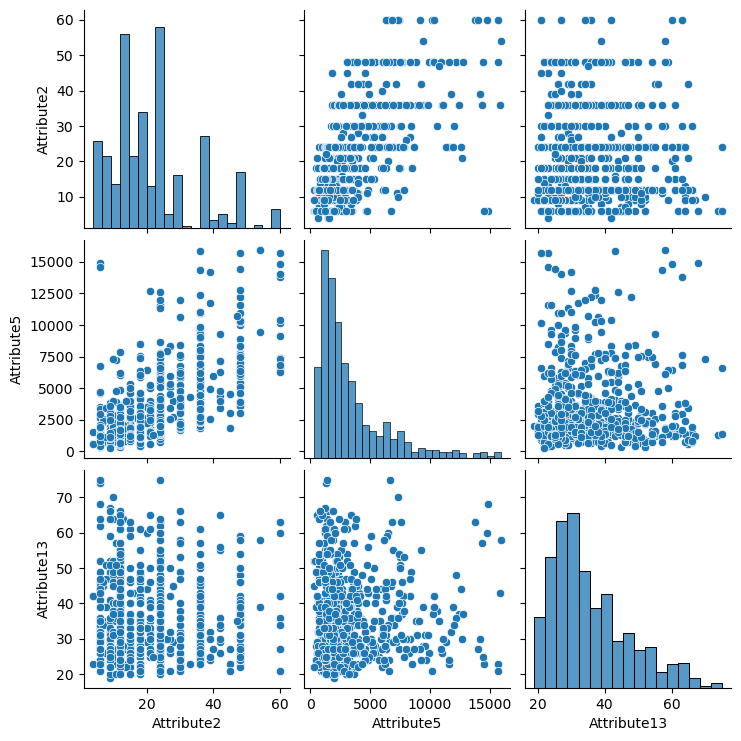

In [26]:
ax = sns.pairplot(data = X_train[numeric_features])
plt.show()

Statistical test for Correlation

In [25]:
sp.stats.pearsonr(X_train['Attribute2'], X_train['Attribute5'])

PearsonRResult(statistic=0.6336301396278662, pvalue=7.511802738214598e-80)

#### VIF

In [ ]:
X = X_train.assign(const = 1)

vif = pd.DataFrame()
vif['VIF'] = [sm.stats.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

print(vif)

# Modeling

## Logistic Regression

### Assumptions

Continuous predictor variables are linearly related to the logit function (transformation of the probability of target variable)

### Transformations

### Model Pipeline

### Run Model

In [ ]:
log_model = GLM.from_formula('Bonus ~ Gr_Liv_Area + C(Central_Air)', data = train, family = Binomial()).fit()
log_model.summary()

### Model Metrics

In [ ]:
X.head(10)

In [ ]:
y.head(10)

In [ ]:
ax = sns.countplot(x = "Attribute1", data = df, color = "blue")
ax.set(xlabel = 'Bonus Eligible',
       ylabel = 'Frequency',
       title = 'Bar Graph of Bonus Eligibility')
plt.show()

In [ ]:
my_report = sv.analyze(df, target_feat = "class)
my_report.show_html()